<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
data = pd.read_csv("car_data.csv")

In [5]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
X = data['Mileage'].values.reshape(-1, 1)
y = data['Price'].values


In [10]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [11]:
slope = regression.coef_[0]
intercept = regression.intercept_


In [13]:
equation = f"Price = {slope:.2f} * Mileage + {intercept:.2f}"

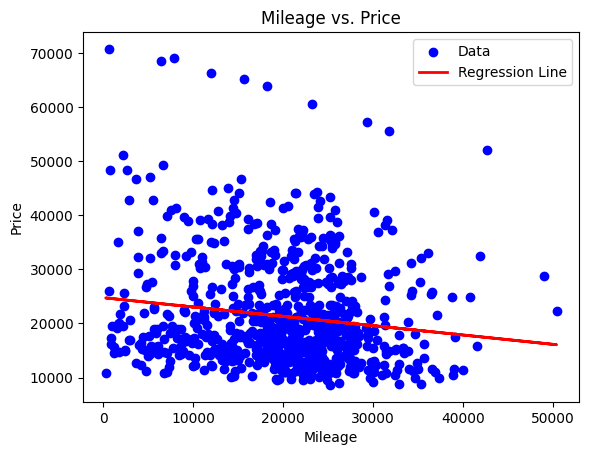

In [14]:
#Create a scatter plot of the original data and plot the regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, regression.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.legend()
plt.show()

In [15]:
# Step 7: Calculate the R2 score
r2_score = regression.score(X, y)
print(f"R2 Score: {r2_score:.2f}")

R2 Score: 0.02


Task 2

In [19]:
features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
target = 'Price'

X = data[features]
y = data[target]

from sklearn.metrics import r2_score as r2
# Fit a linear regression model to the data
regression = LinearRegression()
regression.fit(X, y)

# Calculate the R2 score
y_pred = regression.predict(X)
r2_score = r2(y, y_pred)
print(f"R2 Score: {r2_score:.2f}")

R2 Score: 0.45


Task 3

In [20]:
#to find best predictors

coef_values = regression.coef_
best_predictors = sorted(zip(features, coef_values), key=lambda x: abs(x[1]), reverse=True)
print("Best predictors for price:")
for predictor, coef in best_predictors:
    print(f"{predictor}: {coef:.2f}")

Best predictors for price:
Cruise: 6289.00
Cylinder: 3792.38
Leather: 3349.36
Sound: -1993.80
Doors: -1542.75
Liter: -787.22
Mileage: -0.17
